# Which one is a better plan?

Megaline is a telecom comapny. The company offers its clients two prepaid plans, Surf and Ultimate. We are going to load all files and proceed to clean and analyze both plans to see what is the best for revenue going forward. We will carry out a preliminary analysis of the plans based on 500 clients from 2018. Lets go!

## Initialization

In [1]:
# Loading all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

## Load data

In [2]:
# Load the data files into different DataFrames
mg_calls = pd.read_csv('/datasets/megaline_calls.csv')
mg_internet = pd.read_csv('/datasets/megaline_internet.csv')
mg_messages = pd.read_csv('/datasets/megaline_messages.csv')
mg_plans = pd.read_csv('/datasets/megaline_plans.csv')
mg_users = pd.read_csv('/datasets/megaline_users.csv')

Each dataframe is a different table. The table on calls is all data on each call. The internet table tells us the data on web sessions. The messages table tells us data on texts. The plans table consists of data on the plans. The last table is the users dataframe and that is information on the users. 

## Prepare the data

## Plans

In [3]:
# Print the general/summary information about the plans' DataFrame
# .info() prints out general information on the DF
mg_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Print a sample of data for plans
sample_size = min(5, len(mg_plans))
display(mg_plans.sample(sample_size))

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


The code above will print a sample up to 5 entries from the DF but no more.

In [5]:
# .describe() method gives a description on this dataframe
mg_plans.describe()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


In [6]:
# making sure that there are for sure only 2 plan names that exists
display(mg_plans['plan_name'].unique())

array(['surf', 'ultimate'], dtype=object)

## Fix data

From my observation, it looks like there are no issues to fix at this time. 

## Enrich data
For these sections going forward, I put what I thought it was asking and used projects prior to help with what to do. 

In [7]:
mg_plans['usd_per_message']

0    0.03
1    0.01
Name: usd_per_message, dtype: float64

In [8]:
mg_plans['usd_per_minute']

0    0.03
1    0.01
Name: usd_per_minute, dtype: float64

In [9]:
mg_plans['usd_per_gb']

0    10
1     7
Name: usd_per_gb, dtype: int64

In [10]:
# this checks for missing values
mg_plans.isna().sum()

messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64

In [11]:
# this checks for duplicated rows
mg_plans.duplicated().sum()

0

Notes for Plans 
- A general overview of the plans tells you that there are several different datatypes in the dataframe: integers, floats, and objects.
- There are 8 columns that give you a synopsis on the plans offered. 
- There are 2 plans offered. 
- For the Ultimate plan, you pay 70 USD every month and that includes 3000 call minutes and 1000 messages. 
- The Surf plan costs 20 USD every month and you get 500 call minutes with 50 messages allowed. 
- I printed out costs for plans: 0 for surf and 1 for ultimate. The numbers show what it costs when you go over the plan.
- All columns are non-null, indicating there are no missing values in this DataFrame.
- The .describe() method gives you the count, mean, std, min, 25 percentile, 50 percentile, 75% percentile, and max values. 
- There are no duplicated rows. 

## Users

In [12]:
# Print the general/summary information about the users' DataFrame
mg_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [13]:
# Print a sample of data for users
# .sample() used to create a random sample without replacement of a specified length
mg_users.sample(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
251,1251,Tifany,Mcgee,45,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-01-01,surf,NaN
359,1359,Sherley,Norris,33,"Colorado Springs, CO MSA",2018-02-08,surf,NaN
113,1113,Spencer,Powers,27,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-06-04,ultimate,NaN
432,1432,Azucena,Goodwin,59,"Salt Lake City, UT MSA",2018-10-03,ultimate,NaN
39,1039,Flo,Hicks,56,"Columbus, OH MSA",2018-05-30,ultimate,NaN


In [14]:
mg_users.describe()

,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


### Fix Data

From what I can tell, I don't think there is anything to fix here. 

### Enrich Data

In [15]:
mg_users['city']

0          Atlanta-Sandy Springs-Roswell, GA MSA
1                Seattle-Tacoma-Bellevue, WA MSA
2           Las Vegas-Henderson-Paradise, NV MSA
3                                  Tulsa, OK MSA
4                Seattle-Tacoma-Bellevue, WA MSA
                         ...                    
495    New York-Newark-Jersey City, NY-NJ-PA MSA
496                 New Orleans-Metairie, LA MSA
497       Los Angeles-Long Beach-Anaheim, CA MSA
498    New York-Newark-Jersey City, NY-NJ-PA MSA
499            Orlando-Kissimmee-Sanford, FL MSA
Name: city, Length: 500, dtype: object

In [16]:
mg_users['age']

0      45
1      28
2      36
3      52
4      40
       ..
495    67
496    49
497    49
498    51
499    37
Name: age, Length: 500, dtype: int64

In [17]:
# this checks for missing values
mg_users.isna().sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

In [18]:
# this checks for duplicate rows
mg_users.duplicated().sum()

0

In [19]:
duplicate_ids = mg_users[mg_users.duplicated('user_id')]
display(duplicate_ids)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date


Notes for Users
- There are 8 columns in the users dataframe.
- All columns are non-null, indicating there are no missing values in this DataFrame.
- There are two datatypes in this table: integers and objects.
- All columns names are easy to understand.
- The churn_date column is the date the user stopped using the service (if the value is missing, the calling plan was being used when this database was extracted). Based on that, you see that there 466 values missing.
- There are 0 duplicate rows. 
- From looking at the data that was already ran, you see that there are 500 users and they are all over the states.
- The minimum age is 18 and the maximum age is 75.

## Calls

In [20]:
# Print the general/summary information about the calls' DataFrame
mg_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [21]:
# Print a sample of data for calls
mg_calls.sample(5)

,id,user_id,call_date,duration
35859,1134_262,1134,2018-12-17,3.12
26455,1100_12,1100,2018-10-27,4.78
9140,1042_66,1042,2018-11-06,3.70
59708,1215_93,1215,2018-10-20,12.37
35019,1132_367,1132,2018-07-14,7.42


### Fix data

There are no obvious issues to fix.

### Enrich data

In [22]:
mg_calls['duration']

0          8.52
1         13.66
2         14.48
3          5.76
4          4.22
          ...  
137730     8.72
137731    10.89
137732     8.12
137733     0.37
137734    13.86
Name: duration, Length: 137735, dtype: float64

In [23]:
# check for missing values
mg_calls.isna().sum()

id           0
user_id      0
call_date    0
duration     0
dtype: int64

In [24]:
# check for duplicate rows
mg_calls.duplicated().sum()

0

In [25]:
# displays the first 5 rows
mg_calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


Notes for Calls
- There are no missing values.
- This dataframe doesn't have any duplicate rows. 
- There are 4 columns in the dateframe:id, user_id, call_date, and duration.
- Object, integers, and floats are all the datatypes in this. 
- We know that call duration rounds up in either plans. 
- When you look at the sample and the displayed first 5 rows, you see that the duration for calls can be a minute and some go up to 16 minutes. 
- I added the preview on durations so that we could see extra data.

## Messages

In [26]:
# Print the general/summary information about the messages' DataFrame
mg_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [27]:
# Print a sample of data for messages
mg_messages.sample(5)

,id,user_id,message_date
163,1001_323,1001,2018-11-27
72531,1470_159,1470,2018-07-21
71588,1466_240,1466,2018-07-08
65340,1419_149,1419,2018-11-25
47446,1324_160,1324,2018-06-18


### Fix data

I don't see any issues to be fixed.

### Enrich data

In [28]:
# check for missing values
mg_messages.isna().sum()

id              0
user_id         0
message_date    0
dtype: int64

In [29]:
# check for duplicate rows
mg_messages.duplicated().sum()

0

In [30]:
# displays the first 5 rows
mg_messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


Notes for Messages
- There are 3 total columns: id, user_id, and message_date.
- The datatypes are objects and integers.
- There are no missing values.
- There are no duplicate rows. 

## Internet

In [31]:
# Print the general/summary information about the internet DataFrame
mg_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [32]:
# Print a sample of data for the internet traffic
mg_internet.sample(5)

,id,user_id,session_date,mb_used
93609,1436_435,1436,2018-12-30,129.57
36043,1163_24,1163,2018-10-05,308.77
49352,1220_383,1220,2018-12-16,0.00
90874,1418_138,1418,2018-10-16,632.87
36273,1163_254,1163,2018-10-13,271.13


### Fix data

Everything looks good to me.

### Enrich data

In [33]:
mg_internet['mb_used']

0          89.86
1           0.00
2         660.40
3         270.99
4         880.22
           ...  
104820    218.06
104821    304.72
104822    292.75
104823      0.00
104824    758.31
Name: mb_used, Length: 104825, dtype: float64

In [34]:
# check for missing values
mg_internet.isna().sum()

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

In [35]:
# check for duplicate rows
mg_internet.duplicated().sum()

0

In [36]:
# displays the first 5 rows
mg_internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


Notes for Internet
- There are 104825 entries for this dataframe.
- The columns consist of id, user_id, session_date, and mb_used.
- There are integers, floats, and objects in this file. 
- There are no missing values. 
- There are no duplicate rows. 
- Just by looking at the sample and the displayed first 5 rows, people's data usage are all over. 
- I added the mb_used for additonal insight before diving in.

## Study plan conditions

In [37]:
# Print out the plan conditions and make sure they are clear for you
display(mg_plans)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


A simple breakdown of both plans are displayed. Biggest things to know are the messages included per month, minutes included per month, and data included each month. Another factor is how much it costs each month. Surf is 20 dollars every month for the base plan, and with the ultimate plan you pay 70 dollars.

In [38]:
# Calculate the number of calls made by each user per month. Save the result.
# ensure that 'call_date' is in datetime format
mg_calls['call_date'] = pd.to_datetime(mg_calls['call_date'])
# extract month and year from the call date
mg_calls['month'] = mg_calls['call_date'].dt.month
mg_calls['year'] = mg_calls['call_date'].dt.year
# group the data by 'user_id' and 'month'; count number of calls
calls_per_month = mg_calls.groupby(['user_id', 'month', 'year']).size().reset_index(name='number_of_calls')
# showing first 5 and last 5 rows
display(calls_per_month)
# saving results
calls_per_month.to_csv('calls_per_month.csv', index=False)

,user_id,month,year,number_of_calls
0,1000,12,2018,16
1,1001,8,2018,27
2,1001,9,2018,49
3,1001,10,2018,65
4,1001,11,2018,64
...,...,...,...,...
2253,1498,12,2018,39
2254,1499,9,2018,41
2255,1499,10,2018,53
2256,1499,11,2018,45


In [39]:
# Calculate the amount of minutes spent by each user per month. Save the result.


# ensure call_date is in datetime format
mg_calls['call_date'] = pd.to_datetime(mg_calls['call_date'])
# extract year and month from call_date
mg_calls['year'] = mg_calls['call_date'].dt.year
mg_calls['month'] = mg_calls['call_date'].dt.month
# rounding duration up to the nearest whole number
mg_calls['duration_rounded'] = np.ceil(mg_calls['duration'])
# rounding duration for aggregation
minutes_per_month = mg_calls.groupby(['user_id', 'year', 'month'])['duration_rounded'].sum().reset_index()

display(minutes_per_month)
#save results
minutes_per_month.to_csv('minutes_per_month.csv', index=False)

,user_id,year,month,duration_rounded
0,1000,2018,12,124.0
1,1001,2018,8,182.0
2,1001,2018,9,315.0
3,1001,2018,10,393.0
4,1001,2018,11,426.0
...,...,...,...,...
2253,1498,2018,12,339.0
2254,1499,2018,9,346.0
2255,1499,2018,10,385.0
2256,1499,2018,11,308.0


In [40]:
# Calculate the number of messages sent by each user per month. Save the result.
# make sure 'message_date' is in datetime format
mg_messages['message_date'] = pd.to_datetime(mg_messages['message_date'])
# extract 'year' and 'month' from 'message_date'
mg_messages['year'] = mg_messages['message_date'].dt.year
mg_messages['month'] = mg_messages['message_date'].dt.month
# group by 'user_id', 'year', and 'month' then count messages
messages_per_month = mg_messages.groupby(['user_id', 'year', 'month']).size().reset_index(name='message_count')
#show results to verify
display(messages_per_month)

,user_id,year,month,message_count
0,1000,2018,12,11
1,1001,2018,8,30
2,1001,2018,9,44
3,1001,2018,10,53
4,1001,2018,11,36
...,...,...,...,...
1801,1496,2018,9,21
1802,1496,2018,10,18
1803,1496,2018,11,13
1804,1496,2018,12,11


In [41]:
# Calculate the volume of internet traffic used by each user per month. Save the result.
#convert 'session_date' to datetime format
mg_internet['session_date'] = pd.to_datetime(mg_internet['session_date'])
#extract 'year' and 'month' from 'session_date'
mg_internet['year'] = mg_internet['session_date'].dt.year
mg_internet['month'] = mg_internet['session_date'].dt.month
# group by 'user_id, 'year', and 'month'; sub 'mb_used' for volume
internet_per_month = mg_internet.groupby(['user_id', 'year', 'month'])['mb_used'].sum().reset_index()
# rename 'mb_used' to 'total_mb'
internet_per_month.rename(columns={'mb_used': 'total_mb_used'}, inplace=True)
# save result
internet_per_month.to_csv('internet_per_month.csv', index=False)
# display to verify
display(internet_per_month)

#save results
internet_per_month.to_csv('internet_per_month.csv', index=False)

,user_id,year,month,total_mb_used
0,1000,2018,12,1901.47
1,1001,2018,8,6919.15
2,1001,2018,9,13314.82
3,1001,2018,10,22330.49
4,1001,2018,11,18504.30
...,...,...,...,...
2272,1498,2018,12,23137.69
2273,1499,2018,9,12984.76
2274,1499,2018,10,19492.43
2275,1499,2018,11,16813.83


In [42]:
# Merge the data for calls, minutes, messages, internet based on user_id and month
#merge minutes_per_month with calls_per_month
df_merged = pd.merge(minutes_per_month, calls_per_month, on=['user_id', 'year', 'month'], how='outer')
# merge the result with messages_per_month
df_merged = pd.merge(df_merged, messages_per_month, on=['user_id', 'year', 'month'], how='outer')
# merge the result with internet_per_month
df_merged = pd.merge(df_merged, internet_per_month, on=['user_id', 'year', 'month'], how='outer')
# handling NaN values that could result from the merge (assuming 0 where data is missing)
df_merged.fillna(0, inplace=True)
#checking final merge
display(df_merged)

,user_id,year,month,duration_rounded,number_of_calls,message_count,total_mb_used
0,1000,2018,12,124.0,16.0,11.0,1901.47
1,1001,2018,8,182.0,27.0,30.0,6919.15
2,1001,2018,9,315.0,49.0,44.0,13314.82
3,1001,2018,10,393.0,65.0,53.0,22330.49
4,1001,2018,11,426.0,64.0,36.0,18504.30
...,...,...,...,...,...,...,...
2288,1349,2018,12,0.0,0.0,61.0,13039.91
2289,1361,2018,5,0.0,0.0,2.0,1519.69
2290,1482,2018,10,0.0,0.0,2.0,0.00
2291,1108,2018,12,0.0,0.0,0.0,233.17


In [43]:
# Add the plan information
# merging plan info from mg_users into df_merged
df_final_with_plan = pd.merge(df_merged, mg_users[['user_id', 'plan']], on='user_id', how='left')
# verify merge
display(df_final_with_plan)

,user_id,year,month,duration_rounded,number_of_calls,message_count,total_mb_used,plan
0,1000,2018,12,124.0,16.0,11.0,1901.47,ultimate
1,1001,2018,8,182.0,27.0,30.0,6919.15,surf
2,1001,2018,9,315.0,49.0,44.0,13314.82,surf
3,1001,2018,10,393.0,65.0,53.0,22330.49,surf
4,1001,2018,11,426.0,64.0,36.0,18504.30,surf
...,...,...,...,...,...,...,...,...
2288,1349,2018,12,0.0,0.0,61.0,13039.91,surf
2289,1361,2018,5,0.0,0.0,2.0,1519.69,surf
2290,1482,2018,10,0.0,0.0,2.0,0.00,ultimate
2291,1108,2018,12,0.0,0.0,0.0,233.17,ultimate


In [44]:
# making sure the merging keys are correctly identified
df_user_plans = pd.merge(mg_users, mg_plans, left_on='plan', right_on='plan_name', how='left')
# merging the detailed user_plan info into df_merged
df_final_detailed = pd.merge(df_merged, df_user_plans[['user_id', 'plan', 'usd_monthly_pay', 'minutes_included', 'messages_included', 'mb_per_month_included', 'usd_per_minute','usd_per_message', 'usd_per_gb', 'city']], on='user_id', how='left')
# verify merge
display(df_final_detailed)

,user_id,year,month,duration_rounded,number_of_calls,message_count,total_mb_used,plan,usd_monthly_pay,minutes_included,messages_included,mb_per_month_included,usd_per_minute,usd_per_message,usd_per_gb,city
0,1000,2018,12,124.0,16.0,11.0,1901.47,ultimate,70,3000,1000,30720,0.01,0.01,7,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,2018,8,182.0,27.0,30.0,6919.15,surf,20,500,50,15360,0.03,0.03,10,"Seattle-Tacoma-Bellevue, WA MSA"
2,1001,2018,9,315.0,49.0,44.0,13314.82,surf,20,500,50,15360,0.03,0.03,10,"Seattle-Tacoma-Bellevue, WA MSA"
3,1001,2018,10,393.0,65.0,53.0,22330.49,surf,20,500,50,15360,0.03,0.03,10,"Seattle-Tacoma-Bellevue, WA MSA"
4,1001,2018,11,426.0,64.0,36.0,18504.30,surf,20,500,50,15360,0.03,0.03,10,"Seattle-Tacoma-Bellevue, WA MSA"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1349,2018,12,0.0,0.0,61.0,13039.91,surf,20,500,50,15360,0.03,0.03,10,"Boston-Cambridge-Newton, MA-NH MSA"
2289,1361,2018,5,0.0,0.0,2.0,1519.69,surf,20,500,50,15360,0.03,0.03,10,"Birmingham-Hoover, AL MSA"
2290,1482,2018,10,0.0,0.0,2.0,0.00,ultimate,70,3000,1000,30720,0.01,0.01,7,"New York-Newark-Jersey City, NY-NJ-PA MSA"
2291,1108,2018,12,0.0,0.0,0.0,233.17,ultimate,70,3000,1000,30720,0.01,0.01,7,"Salt Lake City, UT MSA"


In [45]:
# Calculate the monthly revenue for each user

# define function and calculate charges for calls, messages, and data
def calculate_monthly_revenue(row):
    monthly_charge = row['usd_monthly_pay']
    if row['duration_rounded'] > row['minutes_included']:
        monthly_charge += (row['duration_rounded'] - row['minutes_included']) * row['usd_monthly_pay']
    if row['message_count'] > row['messages_included']:
        monthly_charge += (row['message_count'] - row['messages_included']) * row['usd_per_message']
    if row['total_mb_used'] > row['mb_per_month_included']:
        #converting mb to gb incase it is needed
        extra_gb = np.ceil((row['total_mb_used'] - row['mb_per_month_included']) / 1024)
        monthly_charge += extra_gb * row['usd_per_gb']
    return monthly_charge
    
# apply the function to each row in df_final_detailed
df_final_detailed['monthly_revenue'] = df_final_detailed.apply(calculate_monthly_revenue, axis=1)
# check results
display(df_final_detailed[['user_id', 'month', 'monthly_revenue']].head(25))

,user_id,month,monthly_revenue
0,1000,12,70.00
1,1001,8,20.00
2,1001,9,20.00
3,1001,10,90.09
4,1001,11,60.00
5,1001,12,60.00
6,1002,10,20.00
7,1002,11,60.00
8,1002,12,20.00
9,1003,12,12220.00


In [46]:
# calculating revenue for each individual plan
total_revenue_by_plan = df_final_detailed.groupby('plan')['monthly_revenue'].sum().reset_index()

# renaming columns for clarity
total_revenue_by_plan.columns = ['Plan', 'Total Revenue']

# displaying the results
display(total_revenue_by_plan)


,Plan,Total Revenue
0,surf,2026090.93
1,ultimate,52066.00


In [47]:
# calculating monthly revenue for each plan
# group by 'year_month' and 'plan' and sum up 'monthly_revenue', then unstack the 'plan' level to create separate columns
monthly_revenue_by_plan = df_final_detailed.groupby(['year', 'month', 'plan'])['monthly_revenue'].sum().unstack('plan').reset_index()

# resetting index if you prefer a clean DataFrame without hierarchical indexing
monthly_revenue_by_plan.reset_index(drop=True, inplace=True)

# displaying the results
display(monthly_revenue_by_plan)


plan,year,month,surf,ultimate
0,2018,1,40.00,280.0
1,2018,2,6520.24,490.0
2,2018,3,11880.39,896.0
3,2018,4,37262.61,1533.0
4,2018,5,88679.66,2051.0
5,2018,6,108164.49,3367.0
6,2018,7,184637.58,4242.0
7,2018,8,188529.19,5173.0
8,2018,9,196746.09,6195.0
9,2018,10,298579.58,7665.0


In [48]:
# calculating total revenue by city
total_revenue_by_city = df_final_detailed.groupby('city')['monthly_revenue'].sum().reset_index()

# renaming columns for clarity
total_revenue_by_city.columns = ['City', 'Total Revenue']

# Ssrting the result by revenue for better readability
total_revenue_by_city = total_revenue_by_city.sort_values(by='Total Revenue', ascending=False)

# Displaying the results
display(total_revenue_by_city)

,City,Total Revenue
43,"New York-Newark-Jersey City, NY-NJ-PA MSA",361341.46
39,"Minneapolis-St. Paul-Bloomington, MN-WI MSA",164522.38
34,"Los Angeles-Long Beach-Anaheim, CA MSA",139795.01
6,"Baton Rouge, LA MSA",112650.03
26,"Grand Rapids-Kentwood, MI MSA",101563.30
...,...,...
30,"Jacksonville, FL MSA",172.34
66,"Stockton, CA MSA",140.00
11,"Cape Coral-Fort Myers, FL MSA",70.00
46,"Omaha-Council Bluffs, NE-IA MSA",60.00


Aggregate data per users - notes
- I calculated the number of calls made by each user per month. It looks like the number of calls range all over. 
- From my calculations, I see that the minutes spent by each user are in the hundreds. You do have to keep in mind that the minutes round up.
- From the data that I ran, it looks like the amount of calls are higher than the amount of messages being sent.
- I calculated the internet usage and from what I can tell, it looks pretty average. If you think about how often you’re on your phone browsing on the internet, it is probably also sky high. 
- I merged all of the data frames together to make one large table. It includes everything about the user and their plans along with the base and additional charges that accrue. 
- I did the math to get how much each user is paying monthly. Some people go over their plan limits, but most stay within it. 

## Study user behaviour

### Calls

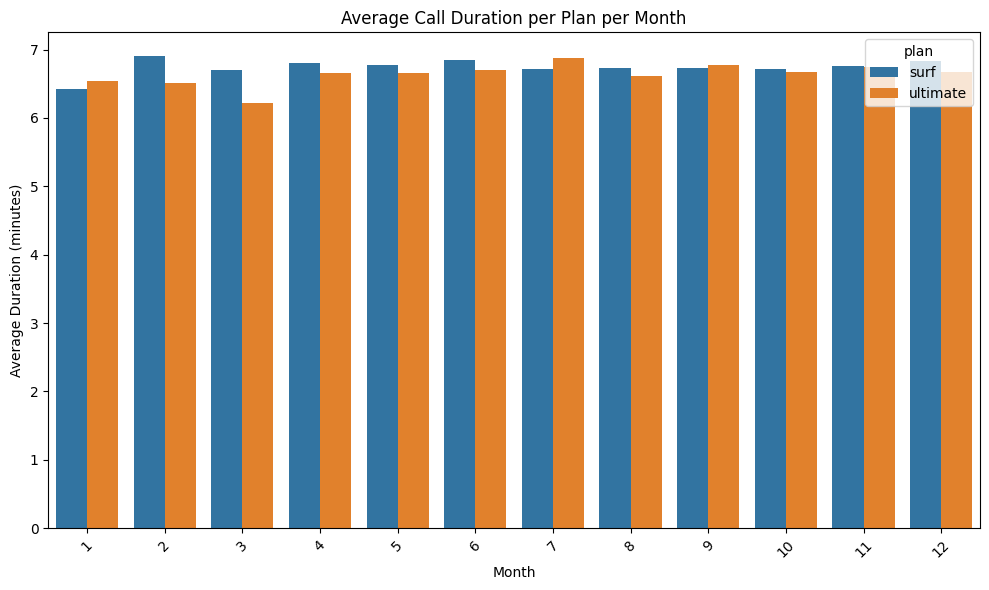

In [49]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.

#  example step for merging calls data with user plan - assuming this hasn't been done yet
df_calls_with_plan = pd.merge(mg_calls, mg_users[['user_id', 'plan']], on='user_id', how='left')

# aggregate data to calculate average call duration per plan per month
# assuming 'month' is already in 'df_calls_with_plan' and formatted as 'YYYY-MM' or similar
average_call_duration = df_calls_with_plan.groupby(['plan', 'month'])['duration'].mean().reset_index()

# plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='duration', hue='plan', data=average_call_duration)
plt.title('Average Call Duration per Plan per Month')
plt.xlabel('Month')
plt.ylabel('Average Duration (minutes)')
plt.xticks(rotation=45)  # rotate month labels 
plt.tight_layout()  # adjust layout to make room for the rotated x-axis labels
plt.show()


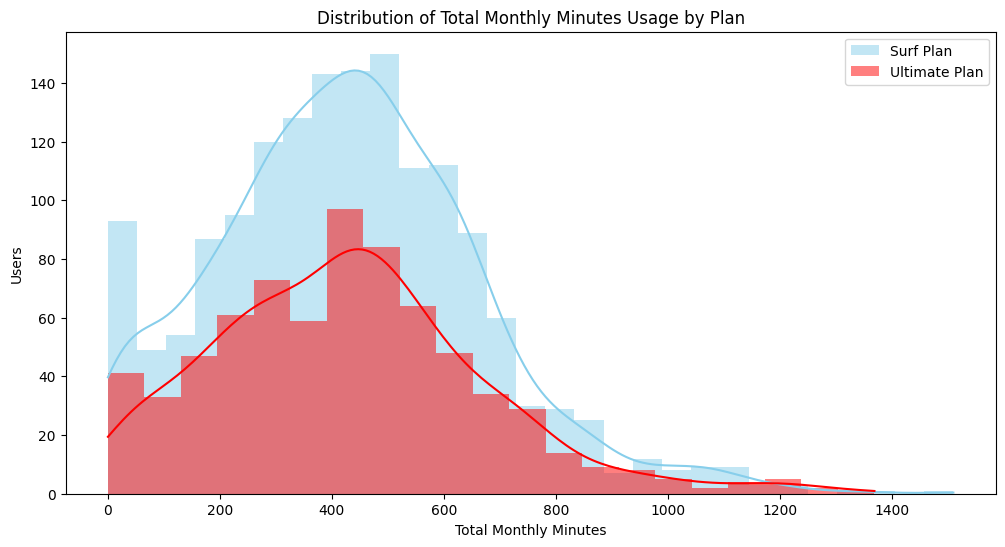

In [50]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.

# filter data by plan for visualization
surf_users = df_final_detailed[df_final_detailed['plan'] == 'surf']['duration_rounded']
ultimate_users = df_final_detailed[df_final_detailed['plan'] == 'ultimate']['duration_rounded']

# set up the matplotlib figure
plt.figure(figsize=(12, 6))

# plot a histogram for each plan
sns.histplot(surf_users, color="skyblue", label='Surf Plan', kde=True, linewidth=0)
sns.histplot(ultimate_users, color="red", label='Ultimate Plan', kde=True, linewidth=0)

plt.title('Distribution of Total Monthly Minutes Usage by Plan')
plt.xlabel('Total Monthly Minutes')
plt.ylabel('Users')
plt.legend()
plt.show()

In [51]:
# Calculate the mean and the variance of the monthly call duration

# calculate mean, variance, and std of monthly call duration_rounded per plan
stats_per_plan = df_final_detailed.groupby('plan')['duration_rounded'].agg(['mean', 'var', 'std']).reset_index()

# rename columns for clarity
stats_per_plan.columns = ['Plan', 'Mean Duration', 'Variance of Duration', 'STD of Duration']

# display the statistics for each plan
display(stats_per_plan)


,Plan,Mean Duration,Variance of Duration,STD of Duration
0,surf,428.749523,54968.279461,234.453150
1,ultimate,430.450000,57844.464812,240.508762


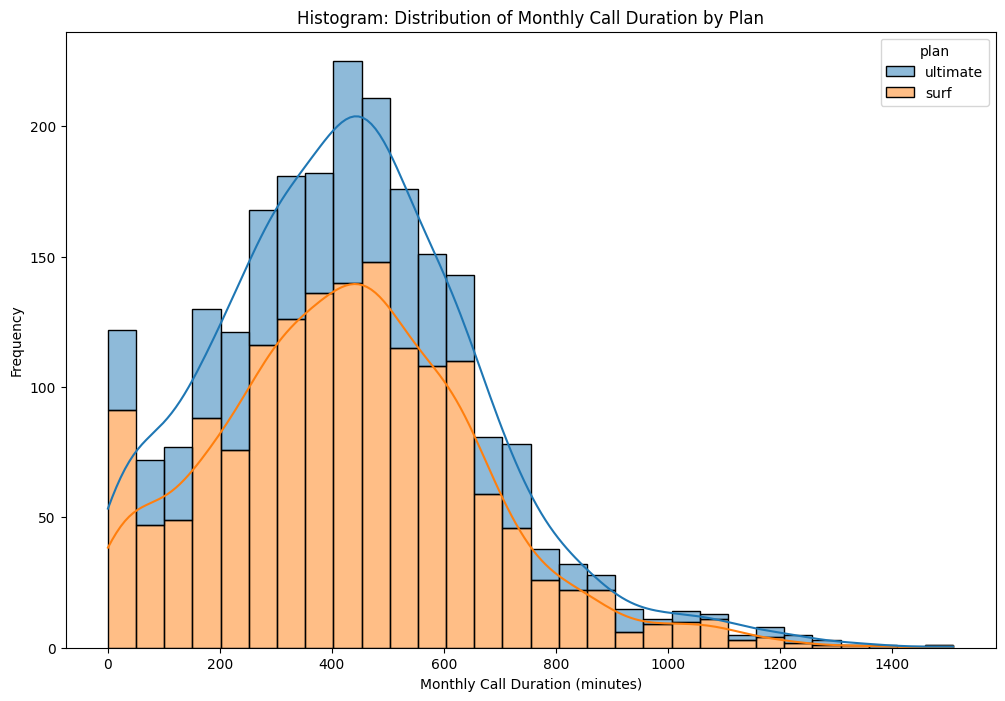

In [52]:
# histogram for monthly call duration per plan
plt.figure(figsize=(12, 8))
sns.histplot(data=df_final_detailed, x='duration_rounded', hue='plan', multiple='stack', bins=30, kde=True)
plt.title('Histogram: Distribution of Monthly Call Duration by Plan')
plt.xlabel('Monthly Call Duration (minutes)')
plt.ylabel('Frequency')

plt.show()

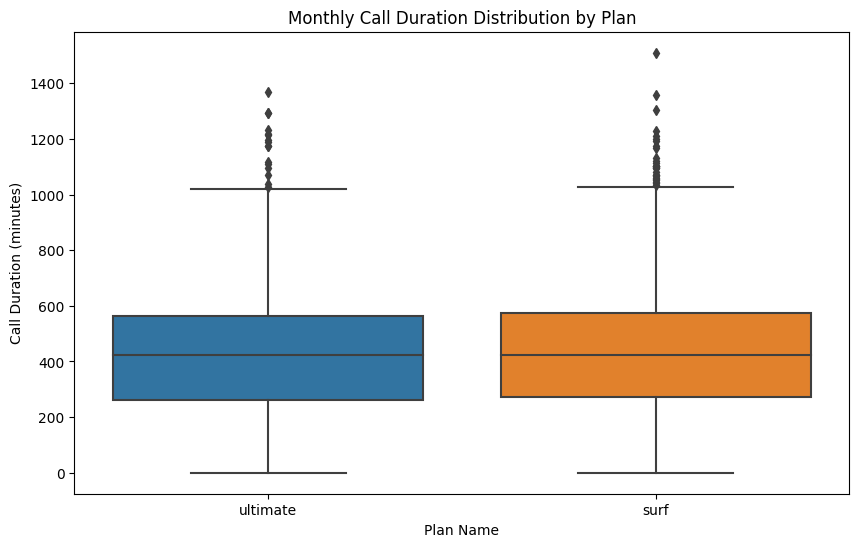

In [53]:
# Plot a boxplot to visualize the distribution of the monthly call duration

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))
# Draw a box plot to show distributions with respect to categories
sns.boxplot(x='plan', y='duration_rounded', data=df_final_detailed)
# Set the plot title and labels
plt.title('Monthly Call Duration Distribution by Plan')
plt.xlabel('Plan Name')
plt.ylabel('Call Duration (minutes)')
# Display the plot
plt.show()

Notes on study user behavior - Calls
- It looks pretty average for the call duration each month. It looks like 8 months out of the year, users on the surf plan are on the phone longer than the users on the ultimate plan on average. It looks like in November, the average duration for both plans are even.
- I plotted the distribution of total mostly minutes usage by plan and you can see that the ultimate plan users are on the phone more than the surf plan users. 
- I calculated the mean and the variance of the monthly call duration. The mean is 405 minutes (not rounded up) and the variance of monthly call duration is 49900 minutes (not rounded up). A high variance indicates that the call durations are spread out over a wider range of values.

### Messages

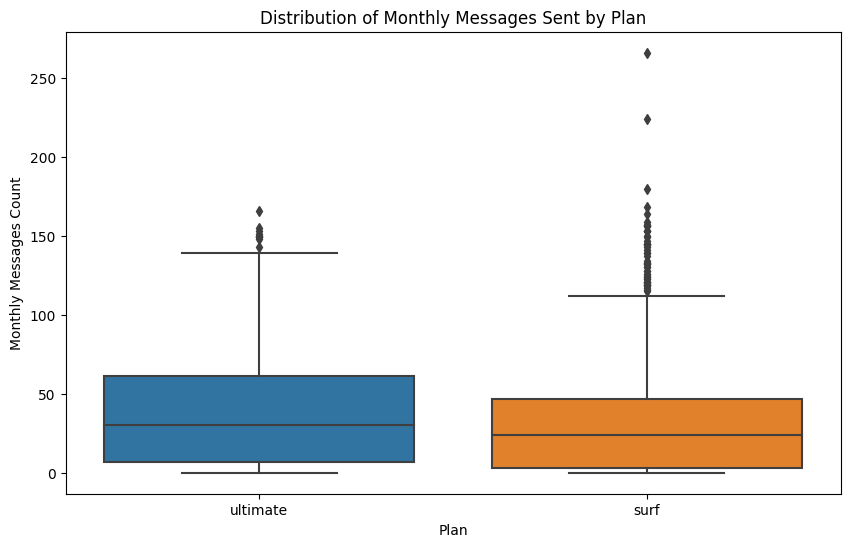

In [54]:
# Compare the number of messages users of each plan tend to send each month

# boxplot
# Assuming df_final already includes 'message_count' per month per user, and their 'plan'
plt.figure(figsize=(10, 6))
sns.boxplot(x='plan', y='message_count', data=df_final_detailed)
plt.title('Distribution of Monthly Messages Sent by Plan')
plt.xlabel('Plan')
plt.ylabel('Monthly Messages Count')
plt.show()

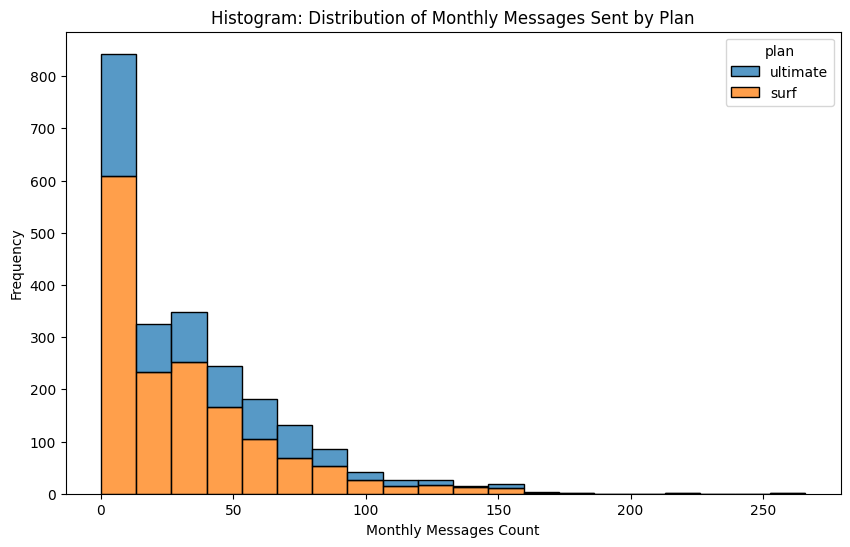

In [55]:
# histogram 
plt.figure(figsize=(10, 6))
sns.histplot(data=df_final_detailed, x='message_count', hue='plan', multiple='stack', bins=20)
plt.title('Histogram: Distribution of Monthly Messages Sent by Plan')
plt.xlabel('Monthly Messages Count')
plt.ylabel('Frequency')
plt.show()

In [56]:
# grouping by 'plan' and calculating mean, variance, and std for 'message_count'
messages_stats = df_final_detailed.groupby('plan')['message_count'].agg(['mean', 'var', 'std']).reset_index()

# renaming columns for clarity
messages_stats.columns = ['Plan', 'Mean Monthly Messages', 'Variance of Monthly Messages', 'STD of Monthly Messages']

# displaying the results
display(messages_stats)

,Plan,Mean Monthly Messages,Variance of Monthly Messages,STD of Monthly Messages
0,surf,31.159568,1126.724522,33.566717
1,ultimate,37.551389,1208.756744,34.767179


Notes on study user behavior - Messages 
- Overall, it looks like ultimate plan users send out more messages than surf plan users. 

### Internet

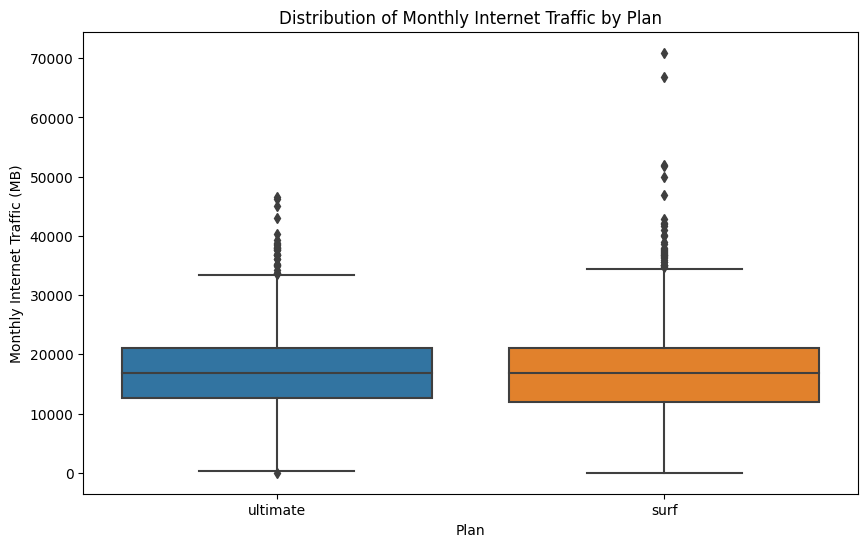

In [57]:
# Compare the amount of internet traffic consumed by users per plan

# Boxplot for internet usage comparison
plt.figure(figsize=(10, 6))
sns.boxplot(x='plan', y='total_mb_used', data=df_final_detailed)
plt.title('Distribution of Monthly Internet Traffic by Plan')
plt.xlabel('Plan')
plt.ylabel('Monthly Internet Traffic (MB)')
plt.show()

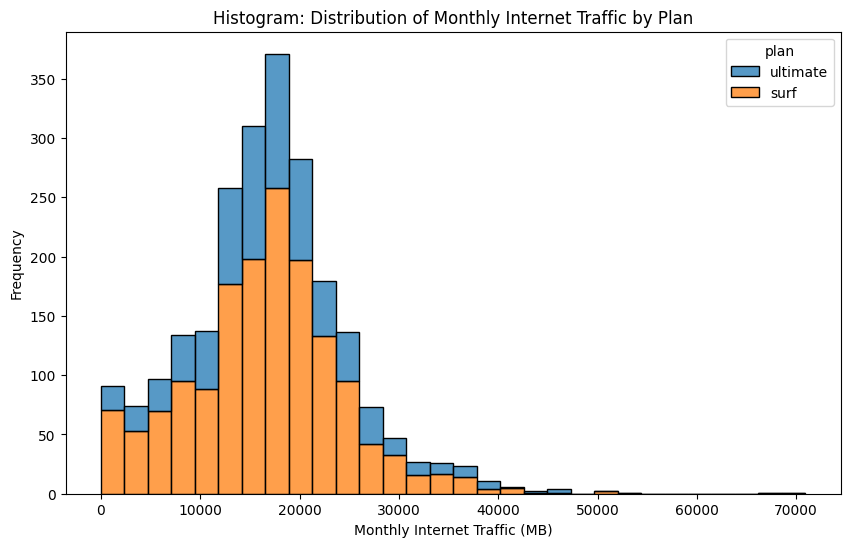

In [58]:
# histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df_final_detailed, x='total_mb_used', hue='plan', multiple='stack', bins=30, kde=False)
plt.title('Histogram: Distribution of Monthly Internet Traffic by Plan')
plt.xlabel('Monthly Internet Traffic (MB)')
plt.ylabel('Frequency')
plt.show()

In [59]:
# assuming 'df_final_detailed' has the columns 'plan' and 'total_mb_used'
# group by 'plan' and calculate mean, variance, and std for 'total_mb_used'
internet_stats = df_final_detailed.groupby('plan')['total_mb_used'].agg(['mean', 'var', 'std']).reset_index()

# Renaming columns for clarity
internet_stats.columns = ['Plan', 'Mean Monthly Internet Traffic', 'Variance of Monthly Internet Traffic', 'STD of Internet Trafffic']

# Displaying the results
display(internet_stats)

,Plan,Mean Monthly Internet Traffic,Variance of Monthly Internet Traffic,STD of Internet Trafffic
0,surf,16558.283490,6.421640e+07,8013.513327
1,ultimate,17214.699694,6.165229e+07,7851.897435


Notes on study user behavior - Internet
- It looks like users on the ultimate plan browse on the internet more than surf plan users. 

## Revenue

Notes on study user behavior - Revenue
- Both plans have different cost. Ultimate is 70 dollars per month and surf is 20 dollars per month. If I had to make a hypothesis on which plan brings in more revenue, I would say ultimate. You pay 70 dollars a month and say you have have 10 users that buy that plan, then your revenue is automatically 700 dollars. Let's say we take another 10 users and have them all buy the surf plan. That's only 200 dollars. 
- Most people stay within plan limits, but some do go over and have a large bill each month.

## Test statistical hypotheses

- My hypothesis for revenue between both plans is that the ultimate plan brings in more revenue based off of the monthly fee alone.
- H0 (Null Hypothesis): There is no significant difference in average monthly revenue between users on the Ultimate plan and users on the Surf plan.
- H1 (Alternative Hypothesis): There is a significant difference in average monthly revenue between users on the Ultimate plan and users on the Surf plan.
- A two-sample t-test with unequal variances is utilized to test the equality of means between two groups. The significance level is set to 0.05 to assess the statistical significance of any observed differences.

In [60]:
# Test the hypotheses

# extration of relevant data; selecting monthly revenue for users on the ultimate plan
ultimate_revenue = df_final_detailed[df_final_detailed['plan'] == 'ultimate']['monthly_revenue']
# selecting monthly revenue for users on the surf plan
surf_revenue = df_final_detailed[df_final_detailed['plan'] == 'surf']['monthly_revenue']
# conducting the two-sample t-test; using equal_var=False for Welch's t-test, which does not assume equal population variance
t_stat, p_value = st.ttest_ind(ultimate_revenue, surf_revenue, equal_var=False)
# display the test statistic and p-value for evaluation; format p value for clarity
display(f"T-statistic: {t_stat}, P-value: {p_value}")
# decision rule based on alpha; alpha set to 0.05 because thats the norm and it means there is a 5% chance or less of the results occurring under the null hypothesis
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in average revenue between the Ultimate and Surf plans.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in average revenue between the plans.")

'T-statistic: -19.12249409969674, P-value: 1.8781824625652306e-73'

Reject the null hypothesis: There is a significant difference in average revenue between the Ultimate and Surf plans.


In [61]:
# Reviewer's code 2

ultimate_revenue

0        70.0
19       70.0
20       84.0
26       70.0
27       70.0
        ...  
2284    112.0
2285     70.0
2290     70.0
2291     70.0
2292     70.0
Name: monthly_revenue, Length: 720, dtype: float64

- My hypothesis for who brings in more revenue, New York/ New Jersey versus other cities, it would be other cities. If you take in the population for both, you would think they bring in more revenue because there are so many people there; however, not everyone that uses these plans are strictly out of these two cities. There spread all over the ocuntry. 
- H0 (Null Hypothesis): The average monthly revenue for users in the NY-NJ area is equal to the average monthly revenue for users in other regions.
- H1 (Alternative Hypothesis): The average monthly revenue for users in the NY-NJ area is different from the average monthly revenue for users in other regions.
- A two-sample t-test with unequal variances is utilized. This test is suitable for comparing means of two independent samples. Alpha is set to 0.05. This significance level is commonly chosen in hypothesis testing to control the probability of Type I errors while allowing for a reasonable chance of detecting meaningful differences if they exist.

In [62]:
# Test the hypotheses

# example extraction of relevant data; selecting monthly revenue for NY and NJ
ny_nj_revenue = df_final_detailed[df_final_detailed['city'].str.contains('NY-NJ')]['monthly_revenue']
# anything that isn't NY and NJ
other_revenue = df_final_detailed[~df_final_detailed['city'].str.contains('NY-NJ')]['monthly_revenue']

# conducting the two-sample t-test; using equal_var=False for Welch's t-test, which does not assume equal population variance
t_stat, p_value = st.ttest_ind(ny_nj_revenue, other_revenue, equal_var=False)

# display the test statistic and p-value for evaluation; format p value for clarity
display(f"T-statistic: {t_stat}, P-value: {p_value}")

# decision rule based on alpha; alpha set to 0.05 because thats the norm and it means there is a 5% chance or less of the results occurring under the null hypothesis
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The average revenue from users in the NY-NJ area is different from that of users in other regions.")
else:
    print("Fail to reject the null hypothesis: There is no statistically significant difference in the average revenue based on region.")


'T-statistic: 0.5600655810739135, P-value: 0.5756485247845854'

Fail to reject the null hypothesis: There is no statistically significant difference in the average revenue based on region.


In [63]:
ny_nj_revenue

56         20.00
57      12300.42
75         20.00
76        100.00
77         20.00
          ...   
2260      120.42
2261      170.27
2262      200.00
2263      110.33
2290       70.00
Name: monthly_revenue, Length: 377, dtype: float64

Test statistical hypotheses - notes
- There is a significant difference in average revenue between the plans. 
- There are no significant differences in average revenue between New York and New Jersey.

# Conclusion
Overall, Megaline seems like a great company providing great plans. The surf plan does the bare minimun for users that don't use their phone often, but it is only 20 dollars and very affordable. The ultimate plan has plenty of minutes, messages, and usage, but it is 70 dollars a month and not everyone can afford that. From the commercial department standpoint, it is worth putting more advertising dollars into the surf plan. The surf plan brings in more money than the ultimate plan. 